In [ ]:
import pandas as pd

df = pd.read_json("totto_data_json/unlabeled_totto_test_data.jsonl", lines=True)
df.to_csv("totto_test_data.csv", index=False)

In [6]:
df = pd.read_json("totto_data_json/unlabeled_totto_test_data.jsonl", lines=True)
df.to_csv("totto_test_data.csv", index=False)

In [17]:
import pandas as pd

df = pd.read_csv("totto_data_csv/totto_dev_data.csv")
display(df.loc[[5]].T)

,5
table,"[[{'value': 'Edition', 'is_header': True, 'col..."
table_webpage_url,http://en.wikipedia.org/wiki/Asian_Beach_Games
table_page_title,Asian Beach Games
table_section_title,List of Asian Beach Games
table_section_text,NaN
highlighted_cells,"[[5, 1], [5, 2], [5, 3], [5, 5], [5, 6], [6, 1..."
example_id,9095314032876340546
overlap_subset,True
sentence_annotations,[{'original_sentence': 'The last Games was hel...


In [6]:
import json

def count_highlighted_headers(table, highlighted_cells) -> int:
    highlighted_set = {(r, c) for r, c in highlighted_cells}
    count = 0
    for r, row in enumerate(table):
        for c, cell in enumerate(row):
            if cell.get("is_header", False) and (r, c) in highlighted_set:
                count += 1
    return count

total = 0
with open("totto_data_json/totto_train_data.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        data = json.loads(line)
        total += count_highlighted_headers(data["table"], data["highlighted_cells"])

print("highlighted header cells:", total)


highlighted header cells: 28833


In [ ]:
import json

target = "Gabriele Becker"
path = "totto_data_json/totto_train_data.jsonl"

with open(path, "r", encoding="utf-8") as f:
    for i, line in enumerate(f, 1):
        data = json.loads(line)
        if data.get("table_page_title") == target:
            print(f"found at line {i}")
            print(data)  # 필요하면 break
            break

found at line 162
{'table': [[{'value': 'Year', 'is_header': True, 'column_span': 1, 'row_span': 1}, {'value': 'Competition', 'is_header': True, 'column_span': 1, 'row_span': 1}, {'value': 'Venue', 'is_header': True, 'column_span': 1, 'row_span': 1}, {'value': 'Position', 'is_header': True, 'column_span': 1, 'row_span': 1}, {'value': 'Event', 'is_header': True, 'column_span': 1, 'row_span': 1}, {'value': 'Notes', 'is_header': True, 'column_span': 1, 'row_span': 1}], [{'value': 'Representing Germany', 'is_header': True, 'column_span': 6, 'row_span': 1}], [{'value': '1992', 'is_header': False, 'column_span': 1, 'row_span': 1}, {'value': 'World Junior Championships', 'is_header': False, 'column_span': 1, 'row_span': 1}, {'value': 'Seoul, South Korea', 'is_header': False, 'column_span': 1, 'row_span': 1}, {'value': '10th (semis)', 'is_header': False, 'column_span': 1, 'row_span': 1}, {'value': '100 m', 'is_header': False, 'column_span': 1, 'row_span': 1}, {'value': '11.83', 'is_header': Fa

In [18]:
## table 열을 판다스 데이터프레임으로 변환하는 함수
import json
import ast
import pandas as pd

def _parse_table(val):
    if isinstance(val, str):
        try:
            return json.loads(val)
        except Exception:
            return ast.literal_eval(val)
    return val

def table_to_df_and_style(table, highlighted_cells):
    table = _parse_table(table)
    highlighted_cells = _parse_table(highlighted_cells)

    df = pd.DataFrame([[cell.get("value", "") for cell in row] for row in table])

    highlight_set = {tuple(rc) for rc in highlighted_cells}

    def _style(data):
        styles = pd.DataFrame("", index=data.index, columns=data.columns)
        for r, c in highlight_set:
            if r in data.index and c in data.columns:
                styles.loc[r, c] = "font-weight: bold;"
        return styles

    return df.style.apply(_style, axis=None)


# 사용 예시
row = df.loc[5]
display(row.T)
display(table_to_df_and_style(row["table"], row["highlighted_cells"]))


table                   [[{'value': 'Edition', 'is_header': True, 'col...
table_webpage_url          http://en.wikipedia.org/wiki/Asian_Beach_Games
table_page_title                                        Asian Beach Games
table_section_title                             List of Asian Beach Games
table_section_text                                                    NaN
highlighted_cells       [[5, 1], [5, 2], [5, 3], [5, 5], [5, 6], [6, 1...
example_id                                            9095314032876340546
overlap_subset                                                       True
sentence_annotations    [{'original_sentence': 'The last Games was hel...
Name: 5, dtype: object

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Edition,Year,Host City,Host Nation,Opened by,Start Date,End Date,Nations,Competitors,Sports,Events,Top Placed Team,Ref.
1,I,2008,Bali,Indonesia,President Susilo Bambang Yudhoyono,18 October,26 October,41,"1,665",17,59,Indonesia (INA),
2,II,2010,Muscat,Oman,Sultan Qaboos bin Said al Said,8 December,16 December,43,"1,131",14,52,Thailand (THA),
3,III,2012,Haiyang,China,State councillor Ma Kai,16 June,22 June,43,"1,336",13,49,China (CHN),
4,IV,2014,Phuket,Thailand,Privy Councilor Surayud Chulanont,14 November,23 November,42,"2,335",26,168,Thailand (THA),
5,V,2016,Da Nang,Vietnam,Prime Minister Nguyen Xuan Phuc,24 September,3 October,41,"2,197",14,172,Vietnam (VIE),
6,VI,2020,Sanya,China,,26 November,5 December,,,,,,


In [19]:
import json, ast

val = df.loc[5, "sentence_annotations"]

# 문자열이면 파싱
if isinstance(val, str):
    try:
        parsed = json.loads(val)
    except Exception:
        parsed = ast.literal_eval(val)
else:
    parsed = val

type(parsed), parsed[:1] if isinstance(parsed, list) else parsed


(list,
 [{'original_sentence': 'The last Games was held in Danang, Vietnam from 24 September to 3 October 2016, while the next games will be held in 2020 in Sanya, China; the first to breakaway from the 2-year cycle.',
   'sentence_after_deletion': 'The last Games was held in Danang, Vietnam from 24 September to 3 October 2016, while the next will be held in 2020 in Sanya, China; the first to breakaway from the 2-year cycle.',
   'sentence_after_ambiguity': 'The last Asian Beach Games was held in Danang, Vietnam from 24 September to 3 October 2016, while the next will be held in 2020 in Sanya, China, the first to breakaway from the 2-year cycle.',
   'final_sentence': 'The last Asian Beach Games was held in Danang, Vietnam from 24 September to 3 October 2016, while the next will be held in 2020 in Sanya, China, the first to breakaway from the 2-year cycle.'}])

In [12]:
import json

path = "totto_data_json/totto_dev_data.jsonl"
max_len = 0
max_text = None

with open(path, "r", encoding="utf-8") as f:
    for line in f:
        ex = json.loads(line)
        for anno in ex.get("sentence_annotations", []):
            sent = anno.get("final_sentence", "")
            if isinstance(sent, str) and len(sent) > max_len:
                max_len = len(sent)
                max_text = sent

print("max_len:", max_len)
print("max_text:", max_text)


max_len: 297
max_text: The LDP's first electoral performance was during the 2007 Serbian parliamentary election, where the LDP ran in a coalition together with the Civic Alliance of Serbia, the Social Democratic Union and the League of Social Democrats of Vojvodina which collectively received 5.31% of the popular vote.


### 당연할수도 있지만 적어보는 정보
표에 대한 정보만이 아니라, table_page_title, table_section_title에 대한 정보도 들어감 -> 입력으로 table_page_title, table_section_title 필요

Incorrect Aggregation - 잘못된 정보 결합
(서로 다른 행의 정보, 다른 엔티티에 속한 값들을 잘못 결합)
-> 행단위 의미를 모델이 충분히 이해하지 못하고 있음을 시사
행, 열 값을 넣어야 모델이 해당 셀이 연결이 되는지 확인 가능

In [11]:
import pandas as pd
import numpy as np

# 1) 전체 규모
print("shape:", df.shape)
print("rows:", len(df), "cols:", df.shape[1])

# 2) 결측치
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing": missing, "missing_%": missing_pct})
display(missing_df[missing_df["missing"] > 0])

# 3) 이상치 (수치형 컬럼 기준 IQR)
num_cols = df.select_dtypes(include=[np.number]).columns
outlier_counts = {}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    outlier_counts[col] = ((df[col] < low) | (df[col] > high)).sum()

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["outliers"])
display(outlier_df[outlier_df["outliers"] > 0].sort_values("outliers", ascending=False))


shape: (120761, 8)
rows: 120761 cols: 8


,missing,missing_%
table_section_text,85363,70.69
table_section_title,4652,3.85


,outliers


## 하이라이트 셀 개수 분포

In [ ]:
from ast import literal_eval

# highlight 정보를 파싱 (문자열로 저장된 경우 대비)
def parse_highlight(x):
    if isinstance(x, str):
        try:
            return literal_eval(x)
        except Exception:
            return x
    return x

df["highlighted_cells"] = df["highlighted_cells"].apply(parse_highlight)

highlight_counts = df["highlighted_cells"].apply(lambda x: len(x) if isinstance(x, list) else 0)
highlight_counts.value_counts().sort_index()

highlighted_cells
1      14410
2      28874
3      34902
4      21180
5       8315
       ...  
369        1
431        1
484        1
508        1
640        1
Name: count, Length: 121, dtype: int64

In [16]:
df[highlight_counts == 640].head()

,table,table_webpage_url,table_page_title,table_section_title,table_section_text,highlighted_cells,example_id,sentence_annotations
110397,"[[{'value': 'No.', 'is_header': True, 'column_...",http://en.wikipedia.org/wiki/List_of_executive...,List of executive actions by Jimmy Carter,NaN,NaN,"[[1, 0], [1, 2], [2, 0], [2, 2], [3, 0], [3, 2...",5674459557091866445,[{'original_sentence': 'Executive Orders numbe...


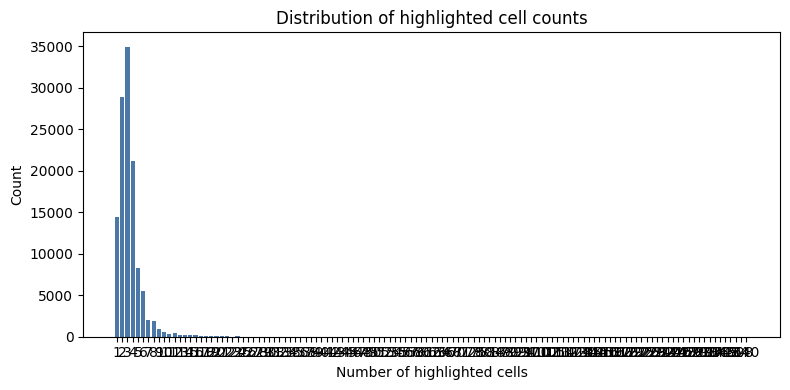

In [13]:
import matplotlib.pyplot as plt

counts = highlight_counts.value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(counts.index.astype(str), counts.values, color="#4C78A8")
plt.xlabel("Number of highlighted cells")
plt.ylabel("Count")
plt.title("Distribution of highlighted cell counts")
plt.tight_layout()
plt.show()


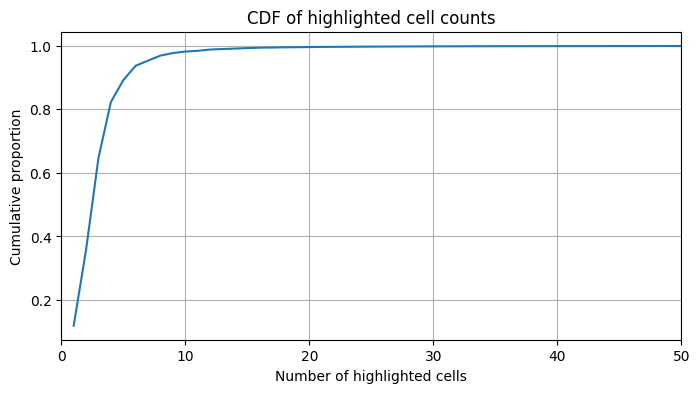

In [16]:
sorted_counts = highlight_counts.sort_values()
cdf = sorted_counts.value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(8, 4))
plt.plot(cdf.index, cdf.values)
plt.xlim(0, 50)   # 보통 여기까지만 봐도 충분
plt.xlabel("Number of highlighted cells")
plt.ylabel("Cumulative proportion")
plt.title("CDF of highlighted cell counts")
plt.grid(True)
plt.show()

In [17]:
# 99퍼센타일 컷오프
cutoff = highlight_counts.quantile(0.99)

df_cut = df[highlight_counts <= cutoff].copy()
df_cut.to_csv("highlight_counts_99pct.csv", index=False, encoding="utf-8")

In [18]:
from ast import literal_eval

# highlight 정보를 파싱 (문자열로 저장된 경우 대비)
def parse_highlight(x):
    if isinstance(x, str):
        try:
            return literal_eval(x)
        except Exception:
            return x
    return x

df_cut["highlighted_cells"] = df_cut["highlighted_cells"].apply(parse_highlight)

highlight_counts = df_cut["highlighted_cells"].apply(lambda x: len(x) if isinstance(x, list) else 0)
highlight_counts.value_counts().sort_index()

highlighted_cells
1     14410
2     28874
3     34902
4     21180
5      8315
6      5473
7      1959
8      1902
9       943
10      591
11      278
12      485
13      185
14      183
Name: count, dtype: int64

### Highlighted Cell 분포가 형성된 이유

#### 데이터 수집 및 어노테이션 특성
ToTTo 데이터셋은 **선택된 테이블 셀을 정확히 서술하는 한 문장(single-sentence)** 생성 태스크를 목표로 설계되었다.  
데이터 수집 과정에서 먼저 문장이 존재하고, 해당 문장에서 **직접적으로 언급된 테이블 셀만 하이라이트**되기 때문에,  
하나의 문장이 참조할 수 있는 셀의 개수에는 자연스러운 상한이 생긴다.

일반적인 자연어 문장은 제한된 정보 밀도를 가지므로,  
대부분의 경우 **2~5개의 셀**만을 참조하는 분포가 형성된다.

반면, 극소수의 샘플에서는 **리스트형 테이블**(예: 시즌별 기록, 수상 내역)과 같이  
같은 열의 여러 행을 한 문장에서 한 번에 언급하는 경우가 존재한다.  
이러한 경우 다수의 셀이 동시에 하이라이트되며, 분포의 long-tail을 형성한다.

---

### 모델링 관점에서의 시사점

#### End-to-End 생성의 한계
테이블 전체를 입력으로 받아 곧바로 문장을 생성하는 end-to-end 방식은  
- 실제로 중요하지 않은 셀까지 함께 사용되거나
- 하이라이트되지 않은 정보를 혼합하는 문제가 발생하기 쉽다.

이는 ToTTo와 같이 **정확성(faithfulness)** 이 중요한 태스크에서 특히 치명적이다.

#### Planner-based 접근의 적합성
Planner-based 모델은 문장 생성을 시작하기 전에 다음을 명시적으로 결정한다:

1. 어떤 셀을 사용할지
2. 어떤 순서로 정보를 서술할지
3. 셀 간의 관계를 어떻게 묶을지

이러한 구조는  
**대부분의 샘플이 2~5개 셀을 참조한다는 분포 특성**과 잘 부합하며,  
`소수 셀 선택 → 간단한 계획 수립 → 문장 생성`이라는 흐름이  
ToTTo의 문장 구조와 자연스럽게 맞아떨어진다.

하이라이트 셀이 적을수록,  
문장은 자유도가 낮아지는 게 아니라 오히려 결정이 더 중요해지고,  
무엇을 말할지·말하지 않을지·어떤 구조로 압축할지를  
사전에 명시하는 planner의 가치가 커진다.

## 하이라이트 셀의 구조적 위치 분포 (단일 row vs 다중 row)

In [14]:
def highlight_row_structure(cells):
    if not isinstance(cells, list) or len(cells) == 0:
        return "none"
    rows = {c[0] for c in cells}  # (row_idx, col_idx) 형태 가정
    return "single_row" if len(rows) == 1 else "multi_row"

row_structure_dist = df["highlighted_cells"].apply(highlight_row_structure).value_counts()
row_structure_dist


highlighted_cells
single_row    92848
multi_row     27913
Name: count, dtype: int64

single_row ≈ 77%, multi_row ≈ 23%
같은 row의 값들은 의미적으로 서로 다를 수 있어,  
column-wise pattern은 잘 잡고, row-wise binding은 깨진다.  
  
row-aware 설계가 필요

테이블 크기 분포 (row x col)

In [ ]:
import matplotlib.pyplot as plt

from ast import literal_eval

def parse_table(x):
    if isinstance(x, str):
        return literal_eval(x)
    return x

df["table_parsed"] = df["table"].apply(parse_table)

table_rows = df["table_parsed"].apply(lambda t: len(t) if isinstance(t, list) else 0)
table_cols = df["table_parsed"].apply(
    lambda t: max((len(r) for r in t), default=0) if isinstance(t, list) else 0
)

# 면적 = rows * cols
table_area = table_rows * table_cols

plt.figure(figsize=(7, 4))
plt.hist(table_area, bins=30, color="#4C78A8")
plt.xlabel("Table area (rows x cols)")
plt.ylabel("Count")
plt.title("Table Size Distribution (Area)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from ast import literal_eval

def parse_if_str(x):
    if isinstance(x, str):
        try:
            return literal_eval(x)
        except Exception:
            return x
    return x

def get_col_header(table, col_idx):
    if table and len(table) > 0 and col_idx < len(table[0]):
        cell = table[0][col_idx]
        if cell.get("is_header", False):
            return cell.get("value", "")
    return ""

def get_row_header(row, col_idx):
    for c in range(col_idx, -1, -1):
        cell = row[c]
        if cell.get("is_header", False):
            return cell.get("value", "")
    return ""

def explode_highlights(df):
    rows = []
    for _, r in df.iterrows():
        table = r["table"]
        highlighted = r["highlighted_cells"]
        page = r.get("table_page_title", "")
        section = r.get("table_section_title", "")
        text = r.get("table_section_text", "")

        for (ri, ci) in highlighted:
            cell = table[ri][ci]
            rows.append({
                "Page Title": page,
                "Section Title": section,
                "Section Text": text,
                "value": cell.get("value", ""),
                "is_header": cell.get("is_header", False),
                "row_header": get_row_header(table[ri], ci),
                "col_header": get_col_header(table, ci),
            })
    return pd.DataFrame(rows)

def format_sample(page, section, text, cells):
    parts = [f"[PAGE] {page}", f"[SEC] {section}", f"[TEXT] {text}"]
    for cell in cells:
        parts.append(
            f"[CELL] {cell['value']} [TYPE] {cell['is_header']} "
            f"[R_HEAD] {cell['row_header']} [C_HEAD] {cell['col_header']}"
        )
    return " ".join(parts)

# 1) CSV 로드
df = pd.read_csv("highlight_counts_99pct.csv")

# 2) 리스트/딕셔너리 복원
df["table"] = df["table"].apply(parse_if_str)
df["highlighted_cells"] = df["highlighted_cells"].apply(parse_if_str)

# 3) 하이라이트 셀 단위로 펼치기
out_df = explode_highlights(df)

# 4) 샘플 단위로 다시 묶어서 직렬화
grouped = out_df.groupby(["Page Title", "Section Title", "Section Text"], dropna=False)

formatted = []
for (page, section, text), g in grouped:
    cells = g[["value", "is_header", "row_header", "col_header"]].to_dict(orient="records")
    formatted.append(format_sample(page or "", section or "", text or "", cells))

# 5) 저장
pd.DataFrame({"input": formatted}).to_csv("linearized_99pct.csv", index=False, encoding="utf-8")


In [1]:
import pandas as pd
from ast import literal_eval

def parse_if_str(x):
    if isinstance(x, str):
        try:
            return literal_eval(x)
        except Exception:
            return x
    return x

def expand_table(table):
    """
    스팬 고려해서 확장된 그리드를 만들고,
    각 그리드 셀에 원본 cell 좌표 (r,c)를 저장.
    """
    # 최대 컬럼 수 계산
    max_cols = 0
    for row in table:
        col_count = 0
        for cell in row:
            col_count += cell.get("column_span", 1)
        max_cols = max(max_cols, col_count)

    grid_src = []   # 각 위치의 원본 (r,c)
    occupied = []

    for r, row in enumerate(table):
        if r >= len(grid_src):
            grid_src.append([None] * max_cols)
            occupied.append([False] * max_cols)

        c = 0
        for cell in row:
            while c < max_cols and occupied[r][c]:
                c += 1

            row_span = cell.get("row_span", 1)
            col_span = cell.get("column_span", 1)

            for rr in range(r, r + row_span):
                while rr >= len(grid_src):
                    grid_src.append([None] * max_cols)
                    occupied.append([False] * max_cols)
                for cc in range(c, c + col_span):
                    if cc < max_cols:
                        grid_src[rr][cc] = (r, c)
                        occupied[rr][cc] = True

            c += col_span

    return grid_src

def get_headers_for_cell(table, grid_src, target_rc):
    """
    target_rc: (ri, ci) 원본 좌표
    row_header: 같은 grid row에서 해당 col을 커버하는 header들
    col_header: 같은 grid col에서 해당 row를 커버하는 header들
    """
    # target cell이 차지하는 grid 위치들 찾기
    target_positions = []
    for gr, row in enumerate(grid_src):
        for gc, src in enumerate(row):
            if src == target_rc:
                target_positions.append((gr, gc))

    if not target_positions:
        return [], []

    # 헤더 후보: 원본 테이블에서 is_header True인 셀들
    header_cells = set()
    for r, row in enumerate(table):
        for c, cell in enumerate(row):
            if cell.get("is_header", False):
                header_cells.add((r, c))

    row_headers = set()
    col_headers = set()

    # target의 모든 grid 위치에 대해 헤더를 수집
    for gr, gc in target_positions:
        # 같은 grid row에 있는 header들
        for col in range(len(grid_src[gr])):
            src = grid_src[gr][col]
            if src in header_cells:
                value = table[src[0]][src[1]].get("value", "")
                if value:
                    row_headers.add(value)

        # 같은 grid col에 있는 header들
        for row in range(len(grid_src)):
            src = grid_src[row][gc]
            if src in header_cells:
                value = table[src[0]][src[1]].get("value", "")
                if value:
                    col_headers.add(value)

    return sorted(row_headers), sorted(col_headers)

def build_input_string(page, section, text, cells):
    parts = [f"[PAGE] {page}", f"[SEC] {section}", f"[TEXT] {text}"]
    for cell in cells:
        parts.append(
            f"[CELL] {cell['value']} [TYPE] {cell['is_header']} "
            f"[R_HEAD] {cell['row_header']} [C_HEAD] {cell['col_header']}"
        )
    return " ".join(parts)

# 1) CSV 로드
df = pd.read_csv("highlight_counts_99pct.csv")

# 2) 리스트/딕셔너리 복원
df["table"] = df["table"].apply(parse_if_str)
df["highlighted_cells"] = df["highlighted_cells"].apply(parse_if_str)
df["sentence_annotations"] = df["sentence_annotations"].apply(parse_if_str)

inputs = []
outputs = []

for _, r in df.iterrows():
    table = r["table"]
    highlighted = r["highlighted_cells"]

    page = r.get("table_page_title", "")
    section = r.get("table_section_title", "")
    text = r.get("table_section_text", "")

    # final_sentence 추출 (첫 번째 문장 사용)
    final_sentence = ""
    anns = r.get("sentence_annotations", [])
    if isinstance(anns, list) and len(anns) > 0:
        final_sentence = anns[0].get("final_sentence", "")

    grid_src = expand_table(table)

    cell_blocks = []
    for (ri, ci) in highlighted:
        cell = table[ri][ci]
        row_headers, col_headers = get_headers_for_cell(table, grid_src, (ri, ci))
        cell_blocks.append({
            "value": cell.get("value", ""),
            "is_header": cell.get("is_header", False),
            "row_header": "|".join(row_headers),
            "col_header": "|".join(col_headers),
        })

    input_str = build_input_string(page, section, text, cell_blocks)
    inputs.append(input_str)
    outputs.append(final_sentence)

# 3) 저장
out_df = pd.DataFrame({"input": inputs, "output": outputs})
out_df.to_csv("linearized_99pct_with_target.csv", index=False, encoding="utf-8")


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1072a3130>>
Traceback (most recent call last):
  File "/Users/jinsuhhur/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
